In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from sklearn.impute import SimpleImputer

In [2]:
os.chdir("/content/Dataset")

In [3]:
files = os.listdir()
files.remove("Economics.pdf")
files.remove("ReadMe.pdf")
files.remove("Weather")

In [4]:
files

['Reference', 'TheAutomators', 'Digilog', 'Automatoes', 'AICU', 'IUACAAS']

In [5]:
TomQuality = {}
for i in files:
  filepath = os.path.join(i, "TomQuality.csv")
  TomQuality[i] = pd.read_csv(filepath)

In [6]:
TomQuality[files[0]].head()

,%time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,43880,74,7.9,15.0,58,187,7.77,NaN
1,43894,73,7.9,14.4,63,217,8.90,NaN
2,43908,76,8.7,15.8,55,284,7.47,9.59
3,43922,79,9.2,13.4,62,214,9.10,8.79
4,43936,73,8.6,12.1,58,238,10.10,8.74


In [7]:
si = SimpleImputer(strategy = "mean")
for i in files:
  column_names = TomQuality[i].columns
  values = TomQuality[i].values
  df = si.fit_transform(values)
  TomQuality[i] = pd.DataFrame(df, columns = column_names)

In [8]:
for i in range(len(files)):
  TomQuality[files[i]]['%time'] = pd.to_datetime(TomQuality[files[i]]['%time'], unit='D', origin='1899-12-30')

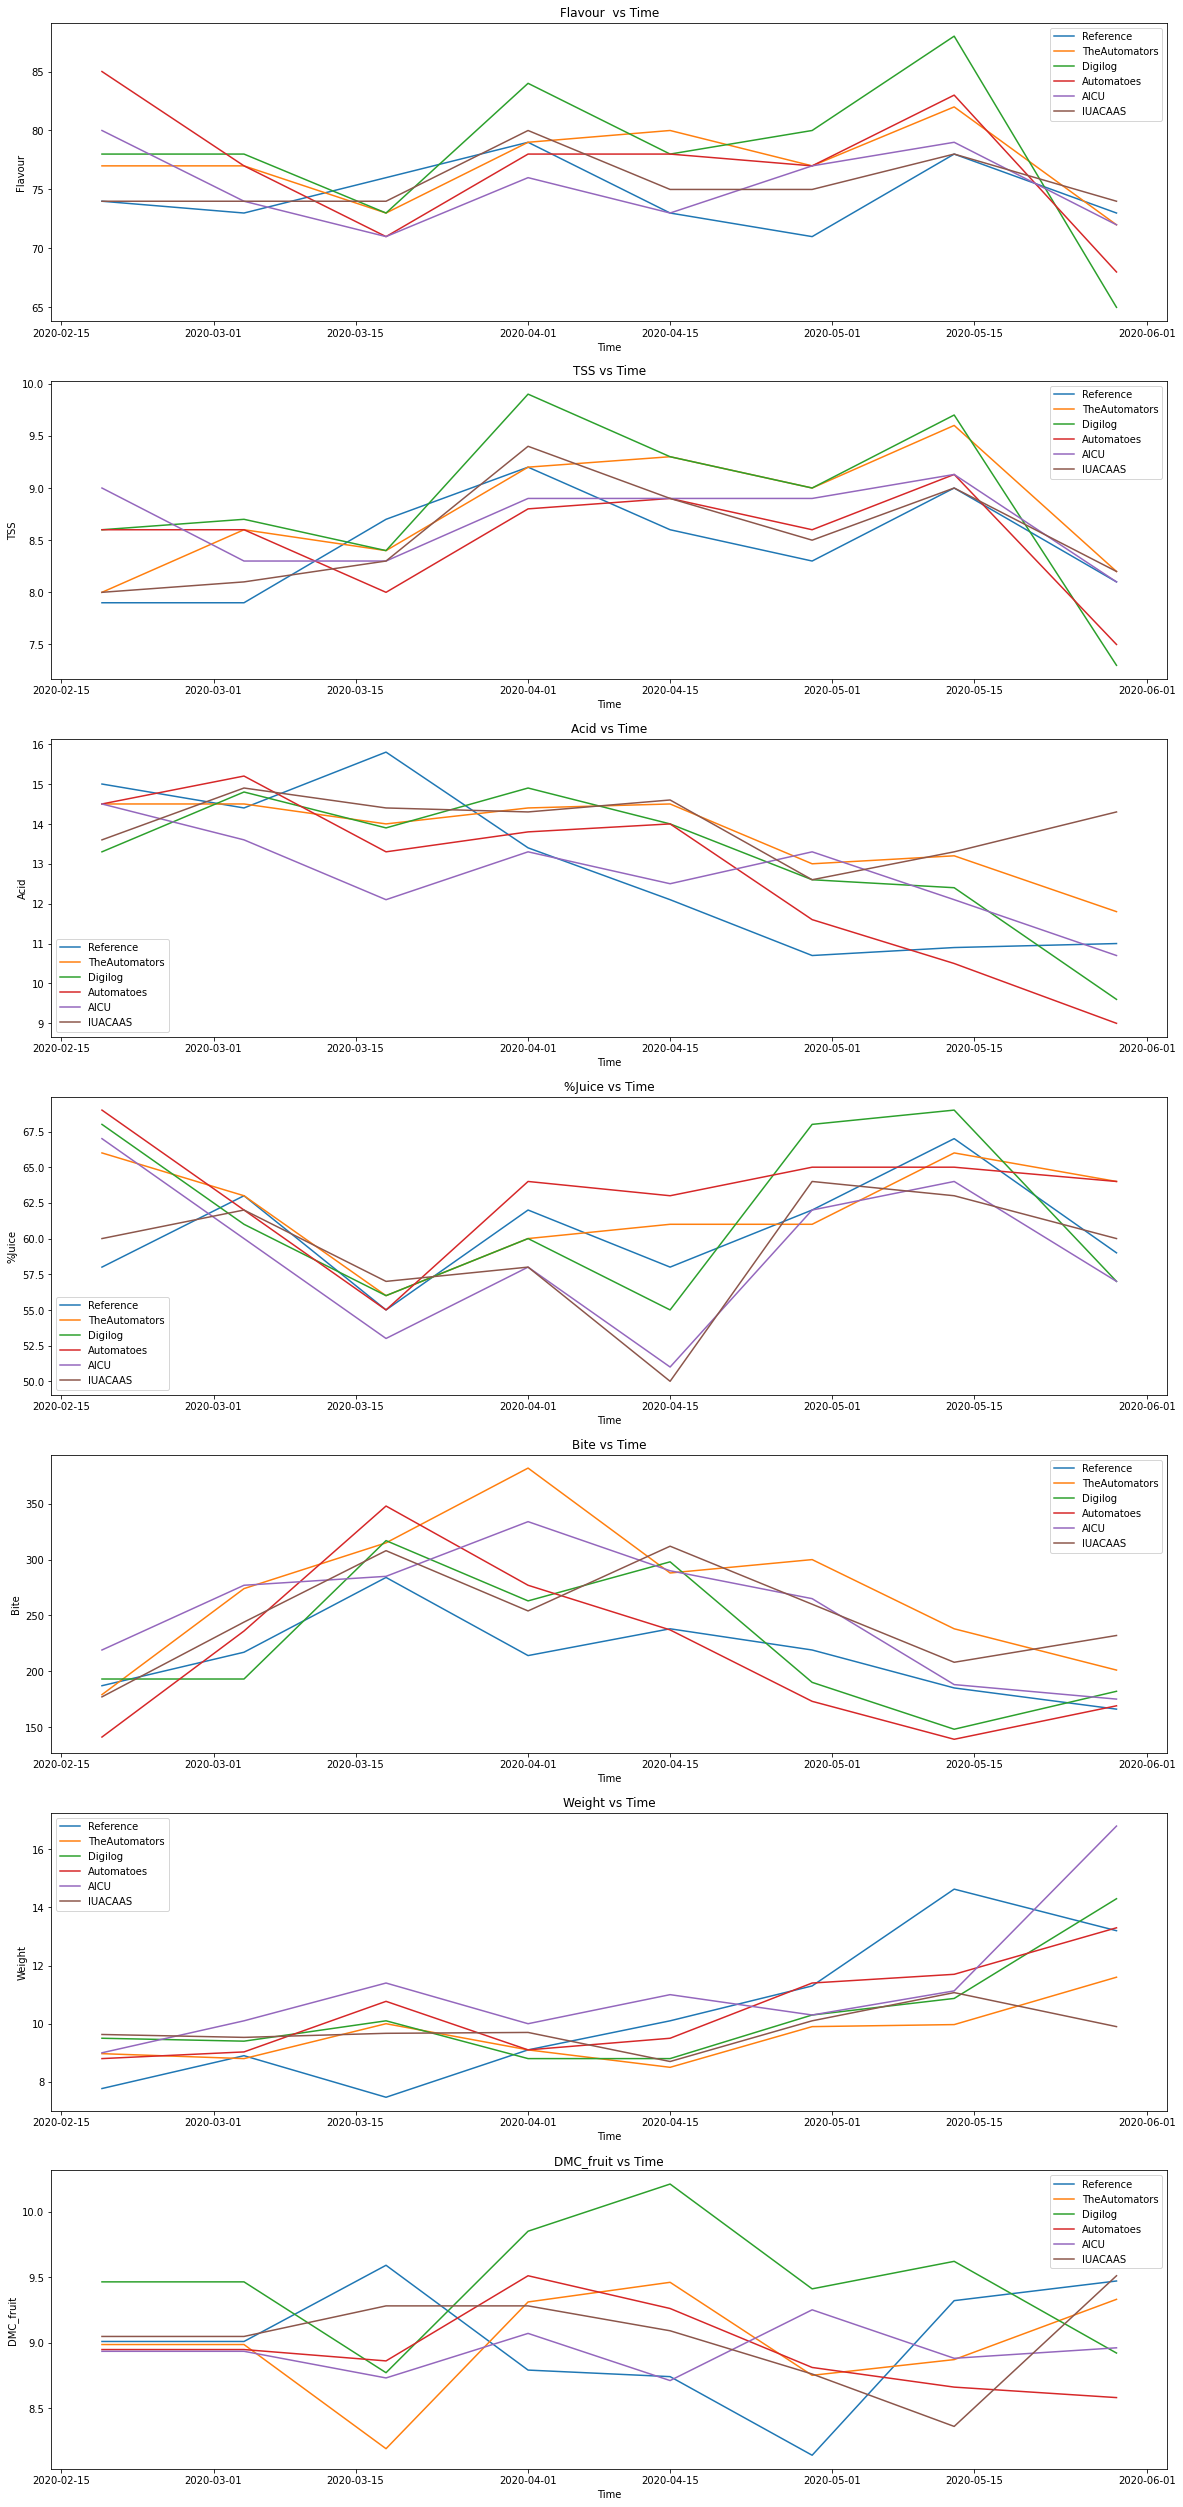

In [9]:
parameters = list(TomQuality[files[0]].columns)
parameters.remove("%time")
plt.figure(figsize = (20, 45))
for paramnum, param in enumerate(parameters):
  plt.subplot(7, 1, paramnum + 1)
  for i in range(len(files)):
    plt.plot(TomQuality[files[i]]["%time"], TomQuality[files[i]][param])
  plt.legend(files, loc = "best")
  plt.title(f"{param} vs Time")
  plt.xlabel("Time")
  plt.ylabel(f"{param}")
plt.show()